In [5]:
from emoji_playground import *
from PIL import Image
import matplotlib.pyplot as plt
import requests
plt.rcParams['figure.dpi'] = 150  

def show(img , cmap = "gray"):
    plt.imshow(img , cmap)
    plt.axis("off")

def NormalizeImage(data):
    new_data = (data ) / (np.max(data) - np.min(data))
    #new_data = 255 * new_data # Now scale by 255
    #new_data = new_data.astype(np.uint8)
    return new_data



In [6]:
current_emoji = "🐶"  #"🐱"#"🦚"
current_filter_name = current_filter_name 

emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA")) 


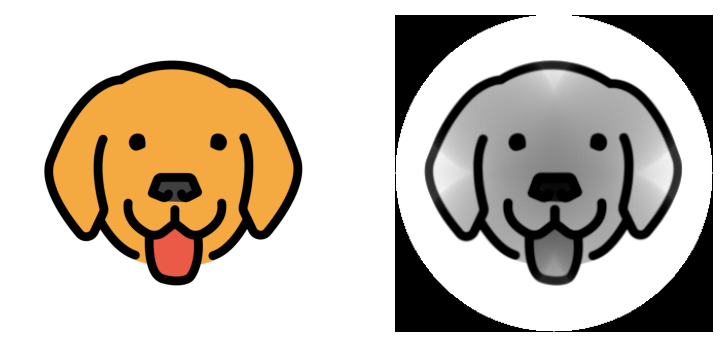

In [7]:
current_filter_name ='radon_iradon'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

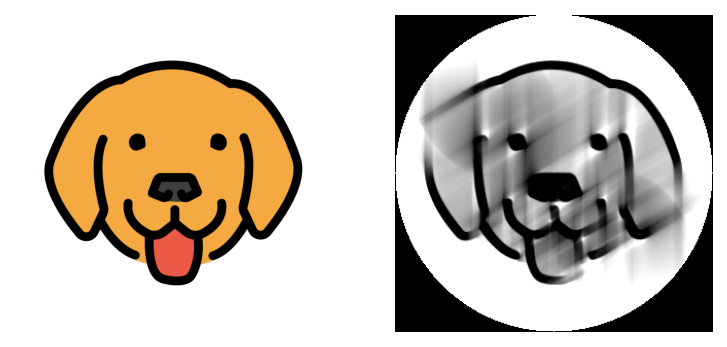

In [8]:
current_filter_name ='radon_iradon_missing'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

(array([3.53773e+05, 2.61300e+03, 5.68568e+05, 6.27400e+03, 2.28038e+05,
        8.75000e+02, 1.04200e+05, 5.01000e+02, 5.81000e+02, 2.62273e+05]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

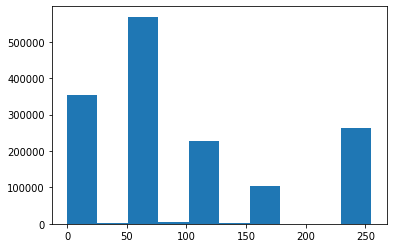

In [7]:
plt.hist(emoji_data.ravel())

In [11]:
def radon_iradon(emoji_data):
    image = rgb2gray(rgba2rgb(emoji_data)) # remove alpha channel and convert to gray
    image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    reconstruction_fbp = iradon(sinogram, theta= theta, filter_name='shepp-logan')
    return abs(reconstruction_fbp)

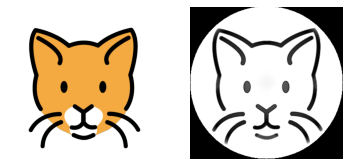

In [38]:
current_filter_name ='radon_iradon'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = radon_iradon(emoji_data)
x = gray2rgb(filtered_image)
show(np.clip(gray2rgb(filtered_image)/0.5, 0,1))

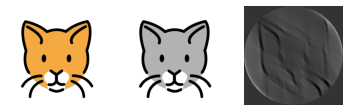

In [6]:
current_emoji = "🐱"
current_filter_name = current_filter_name
emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA"))

from skimage.transform import radon, rescale
from skimage.color import rgba2rgb,rgb2gray, gray2rgb
from skimage.transform import iradon

def radon_iradon(emoji_data):
    image = rgb2gray(rgba2rgb(emoji_data)) # remove alpha channel and convert to gray
    image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    reconstruction_fbp = iradon(sinogram[:,:-200], theta=theta[:-200], filter_name='shepp-logan')
    return reconstruction_fbp

plt.subplot(1,3,1)
plt.imshow(emoji_data , "gray")
plt.axis("off")
plt.subplot(1,3,2)
img = rgb2gray(rgba2rgb(emoji_data))
plt.imshow(img , "gray")
plt.axis("off")
plt.subplot(1,3,3)
filtered_image = radon_iradon(emoji_data)
show(filtered_image)

(-0.5, 617.5, 617.5, -0.5)

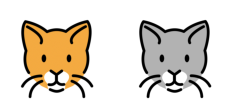

In [7]:
plt.subplot(1,3,1)
from skimage.color import rgba2rgb
img_rgb = rgba2rgb(emoji_data)

plt.imshow(img_rgb)
plt.axis("off")
plt.subplot(1,3,2)
img = rgb2gray(img_rgb)
plt.imshow(img , "gray")
plt.axis("off")